In [1]:
from ase.io import read
import numpy as np
import diffraction as diff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time as time
from matplotlib.widgets import Button
import scipy.io
from matplotlib.widgets import RangeSlider
import scipy.ndimage as ndimage
import matplotlib.patheffects as path_effects
from CifFile import ReadCif
from scipy.optimize import curve_fit

In [9]:
# use thetax and thetay to adjust initial orientation of the sample
thetax=np.pi/2*0
thetay=np.pi/2*0
hkl_dimension=10

# sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
sigma1=1000

# sigma_phi
sigma2=1000

# sigma_r, use this to tune the peak linewidth
sigma3=0.03

# settings for imagine plane
resolutionx=300
qxymax=1.2
qxymin=-0.1
qzmax=1.2
qzmin=-0.1

resolutionx+=2
resolutionz=int(resolutionx/qxymax*qzmax)
gridx,gridz=np.meshgrid(np.linspace(qxymin,qxymax,resolutionx),np.linspace(qzmin,qzmax,resolutionz))

In [10]:
# read crystal structure(POSCAR file which can be converted easily from cif on VESTA)
dirr = ''
filename = 'test'
address = dirr + filename +'.cif'
# cf = ReadCif(address)

a1,a2,a3,positions=diff.read_poscar(address) # example (graphite)
# a1,a2,a3,positions=diff.read_poscar(address) # example (graphite)

Bpeaks,Mqxy,Mqz,I_miller = diff.Bragg_peaks(a1,a2,a3,positions,thetax,thetay,hkl_dimension)
# Bpeaks = diff.diffuse(a1,a2,a3,positions,thetax,thetay,hkl_dimension,0)
# Bpeaks.shape


Chemical Formula:  C28H88I28N12Pb8
Lattice parameter a:  [8.8412 0.     0.    ]
Lattice parameter b:  [0.     8.8436 0.    ]
Lattice parameter c:  [ 0.      0.     33.6045]


In [11]:
t1_start = time.process_time()
# calculated GIWAXS pattern
III=diff.intensity(gridx,gridz,Bpeaks,sigma1,sigma2,sigma3,hkl_dimension)
t1_stop = time.process_time()
print('cpu time =')


print(t1_stop-t1_start,'s')

cpu time =
15.321668000000017 s


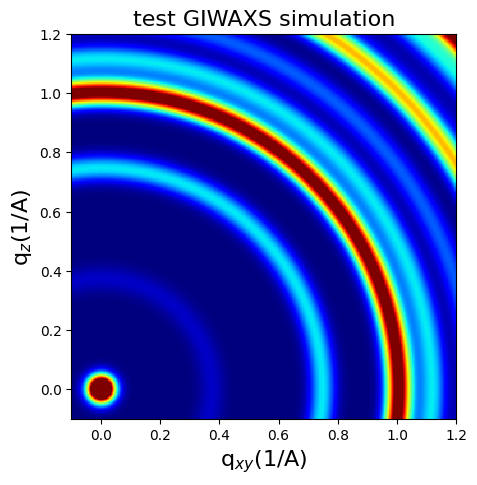

In [13]:
 # make the plot
colorbar=0.5   # upper limit
    
# II1=np.log(III+1)

II1=III

fig,ax=plt.subplots(figsize=(14,14))

plt.imshow(II1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin, qxymax, qzmin, qzmax],
               vmax=colorbar*II1.max(), vmin=II1.min())
ax.set_xlabel('q$_{xy}$(1/A)',fontsize=16)
ax.set_ylabel('q$_{z}$(1/A)',fontsize=16)
ax.set_title(filename+' GIWAXS simulation',fontsize=16)
# ax.set_title('Reversed GIWAXS problem',fontsize=16)
fig.set_size_inches([7,5])
# plt.savefig(dirr + filename +'_1' +'.pdf')
# plt.savefig('2anc2_log.pdf')
# scipy.io.savemat(dirr+filename+'.mat', {'a': III})

[1.00177868e+02 3.57116736e-01 3.20818020e-02]


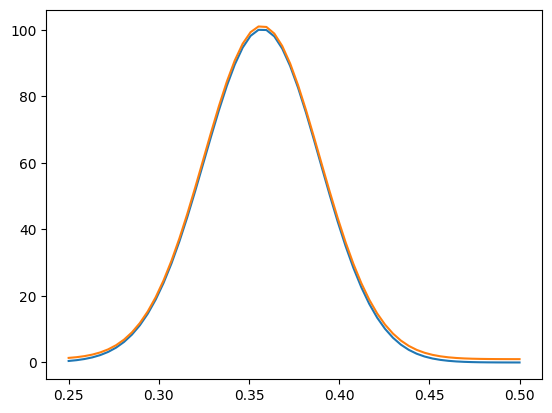

In [14]:
z_start=0.25
z_end=0.5

z_start_point=int(len(III[:,50])/(qzmax-qzmin)*(z_start-qzmin))
z_end_point=int(len(III[:,50])/(qzmax-qzmin)*(z_end-qzmin))

x_fit=np.linspace(z_start,z_end,len(III[z_start_point:z_end_point,50]))
y_fit=III[z_start_point:z_end_point,50]/max(III[z_start_point:z_end_point,50])*100
plt.plot(x_fit,y_fit)
def gaussian(x,a,b,c):
    return a*np.exp(-pow(x-b,2)/c/c/2)
popt, pcov = curve_fit(gaussian, x_fit, y_fit,[100,0.5,0.01], maxfev=50000)
plt.plot(x_fit,gaussian(x_fit,*popt)+1)
print(popt)